# TASK 3: CLUSTERING ANALYSIS (K-MEANS)

## OBJECTIVE:
- Standardize the dataset (e.g., using StandardScaler).
- Apply K-Means clustering and determine the optimal
- number of clusters using the elbow method.
- Visualize clusters using 2D scatter plots.

### 1. IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 2. READING THE CSV FILE

In [6]:
churn=pd.read_csv('churn-bigml-80.csv')
print(churn)

     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

### 3. CHECKING FOR NULL VALUES

In [8]:
churn.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### 4.VERIFYING THE DATATYPES

In [10]:
churn.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [11]:
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 5. ENCODING CATEGORICAL VALUES

In [13]:
le=LabelEncoder()
churn['State']=le.fit_transform(churn['State'])

In [14]:
le1=LabelEncoder()
churn['International plan']=le1.fit_transform(churn['International plan'])

In [15]:
le2=LabelEncoder()
churn['Voice mail plan']=le2.fit_transform(churn['Voice mail plan'])

In [16]:
le3=LabelEncoder()
churn['Churn']=le3.fit_transform(churn['Churn'])

In [17]:
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 6. STANDARDIZE- STANDARD SCALER

In [19]:
sc=StandardScaler()

In [20]:
churn_scaled=sc.fit_transform(churn)
churn_scaled

array([[-0.67270017,  0.69216332, -0.52781119, ..., -0.08568137,
        -0.42917241, -0.41270431],
       [ 0.60084425,  0.16127783, -0.52781119, ...,  1.24292063,
        -0.42917241, -0.41270431],
       [ 0.33272963,  0.91968567, -0.52781119, ...,  0.69819381,
        -1.19195484, -0.41270431],
       ...,
       [ 1.53924539, -0.82465237, -0.52781119, ..., -0.23182759,
         1.09639245, -0.41270431],
       [ 0.86895886, -1.83586283,  1.70679716, ...,  1.38906685,
         0.33361002, -0.41270431],
       [ 1.07004482, -0.6729708 , -0.52781119, ...,  1.24292063,
        -1.19195484, -0.41270431]])

In [21]:
churn_f=pd.DataFrame(churn_scaled,columns=churn.columns,index=churn.index)
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 7. OPTIMAL NUMBER OF CLUSTERS(ELBOW METHOD)

In [23]:
wcss=[]
for i in range(1,11):
    model_imp=KMeans(n_clusters=i,random_state=42)
    model_imp.fit(churn_f)
    wcss.append(model_imp.inertia_)

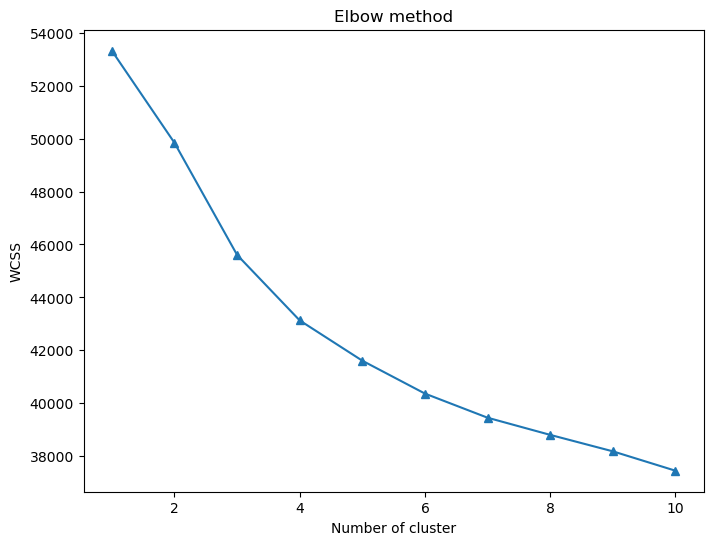

In [24]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='^')
plt.title('Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

### 8. KMEANS

In [26]:
model_imp=KMeans(n_clusters=3,random_state=42)
clusters=model_imp.fit_predict(churn_f)
churn['Clusters']=clusters

### 9. VISUALIZING THE CLUSTERS

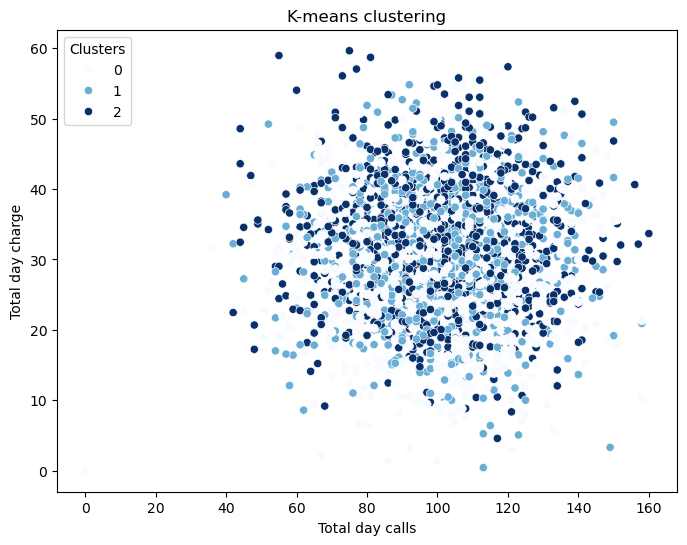

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total day calls',y='Total day charge',hue='Clusters',data=churn,palette='Blues')
plt.title('K-means clustering')
plt.xlabel('Total day calls')
plt.ylabel('Total day charge')
plt.show()